## Get a connection to the sdas server

In [1]:
from sdas.core.client.SDASClient import SDASClient
from sdas.core.SDAStime import Date, Time, TimeStamp
host='baco.ipfn.ist.utl.pt'
port=8888
client = SDASClient(host,port)

## Search events

In [2]:
found = client.searchDeclaredEventsByName('S')

found = client.searchDeclaredEventsByName('SHOT', 'pt')

# found = client.searchDeclaredEventsByUniqueID('SHOT', 'pt')

found = client.searchDeclaredEventsByDescription('SHOT')

found = client.searchDeclaredEventsByDescription('SHOT', 'pt')

for item in found:
    print(f'item, {item}')
max = client.searchMaxEventNumber('0x0000')

min = client.searchMinEventNumber('0x0000')

## Search parameters

In [3]:
parametersFound = client.searchParametersByName('DENS')

parametersFound = client.searchParametersByName('DENS', 'pt')

parametersFound = client.searchParametersByUniqueID('DENS')

for p in parametersFound:
    print(p['descriptorUID']['uniqueID'])

POST.PROCESSED.DENSITY
TR512_TEST.TR512_BOARD.DENSITY
PYTHON_TEST.PYTHON_HW_2_TEST.DENSITY
PLASMACONTROLNODE.PLASMACONTROL.DENSITY
TR256_TEST.TR256_BOARD.DENSITY
TR512_TEST_PAPRIKA.TR512_B02.DENSITY
TR512_TEST_PAPRIKA.TR512_B01.DENSITY
TR512_TEST_PAPRIKA.TR512_B00.DENSITY
TR256_TEST.TR512_BOARD.DENSITY
CENTRAL.OS9_DAC.DENSITY
CENTRAL.OS9_CLOCK.DENSITY


## Search data
This function returns the parameters unique identifiers where the data isn’t null for the selected event:

In [4]:
dataFound = client.searchDataByEvent('0x0000', 17898)
for d in dataFound:
    print(d)

POST_PROCESSED.DENSITY
POST_PROCESSED.IPLASMA
TR512_TOMOGRAPHY_TR512_B06.CHANNEL_0
TR512_TOMOGRAPHY_TR512_B06.CHANNEL_1
TR512_TOMOGRAPHY_TR512_B06.CHANNEL_5
TR512_TOMOGRAPHY_TR512_B06.CHANNEL_6
TR512_TOMOGRAPHY_TR512_B06.CHANNEL_7
TR512_TOMOGRAPHY_TR512_B03.CHANNEL_4
TR512_TOMOGRAPHY_TR512_B03.CHANNEL_5
TR512_TOMOGRAPHY_TR512_B02.CHANNEL_0
TR512_TOMOGRAPHY_TR512_B02.CHANNEL_1
TR512_TOMOGRAPHY_TR512_B02.CHANNEL_2
TR512_TOMOGRAPHY_TR512_B02.CHANNEL_3
TR512_TOMOGRAPHY_TR512_B02.CHANNEL_4
TR512_TOMOGRAPHY_TR512_B02.CHANNEL_5
TR512_TOMOGRAPHY_TR512_B02.CHANNEL_6
TR512_TOMOGRAPHY_TR512_B02.CHANNEL_7
TR512_TOMOGRAPHY_TR512_B01.CHANNEL_0
TR512_TOMOGRAPHY_TR512_B01.CHANNEL_1
TR512_TOMOGRAPHY_TR512_B01.CHANNEL_2
TR512_TOMOGRAPHY_TR512_B01.CHANNEL_3
TR512_TOMOGRAPHY_TR512_B01.CHANNEL_4
TR512_TOMOGRAPHY_TR512_B01.CHANNEL_5
TR512_TOMOGRAPHY_TR512_B01.CHANNEL_6
TR512_TOMOGRAPHY_TR512_B01.CHANNEL_7
TR512_TOMOGRAPHY_TR512_B00.CHANNEL_0
TR512_TOMOGRAPHY_TR512_B00.CHANNEL_1
TR512_TOMOGRAPHY_TR512_B00.CH

## Get data
NOTE: The unique identifiers are CASE-SENSITIVE

The returned data structure gives you information about:

start time, 
end time, 
time of the event, 
mime_type, 
the parameter unique identifier, 
Import extra libraries

In [5]:
import numpy
import matplotlib.pyplot as plt

Data for only one parameter

In [6]:
dataStructArray=client.getData('POST.PROCESSED.DENSITY','0x0000', 17898)
dataStruct=dataStructArray[0]
density=dataStruct.getData()
tstart = dataStruct.getTStart()
tend = dataStruct.getTEnd()

Calculate the time between samples, 
Get the events  associated with this data, 
The event time (I’m assuming the event I want is at the index 0, but I should check first...), 
The delay of the start time relative to the event time, 
Finally create the time array, 
And plot the data, 
If the plot doesn't show, you may need to run.

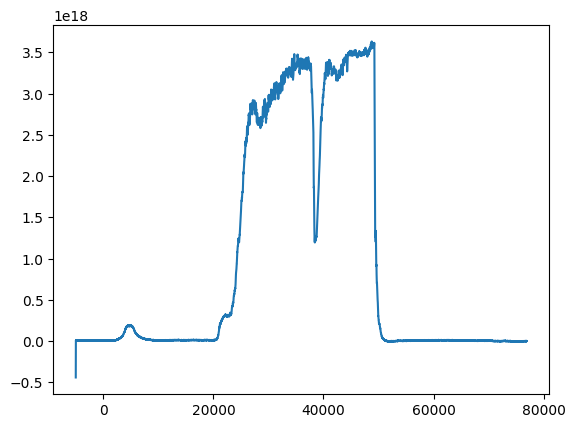

In [7]:
tbs = (tend.getTimeInMicros() - tstart.getTimeInMicros())/len(density)
events = dataStruct.get('events')
tevent = TimeStamp(tstamp=events[0].get('tstamp'))
delay = tstart.getTimeInMicros() - tevent.getTimeInMicros()
times = numpy.linspace(delay,delay+tbs*(len(density)-1),len(density))
plt.plot(times, density)
plt.show()